<center><h1>TASK - HARSH RAMAN</h1></center>

<center><bold><h1>ANSWER</h1></bold></center>

In [33]:
import numpy as np
import pandas as pd

<h6>Importing Dataset</h6>

In [34]:
dataset = pd.read_csv('musk_csv.csv')

In [35]:
dataset.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


<h6>Train - Test Split</h6>

In [36]:
independentVariables = dataset.iloc[:, 3:-1].values
dependentVariables = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independentVariables, dependentVariables, test_size=0.2, random_state=0)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5278, 166) (1320, 166) (5278,) (1320,)


<h6>Standard Scaling</h6>

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/Users/harshramandas/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [39]:
import tensorflow.keras

In [271]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, PReLU, ELU, BatchNormalization, Dropout

<h6>Creating a Sequential Model</h6>

In [243]:
classifier = Sequential()

<h6>Adding a dense hidden layer and activating it with a relu as regression</h6>

In [244]:
classifier.add(Dense(units = 120, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

In [245]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

<h6>Adding Final layer with sigmoid activation for a binary classification.</h6>

In [246]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [247]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_441 (Dense)            (None, 120)               20040     
_________________________________________________________________
dense_442 (Dense)            (None, 6)                 726       
_________________________________________________________________
dense_443 (Dense)            (None, 1)                 7         
Total params: 20,773
Trainable params: 20,773
Non-trainable params: 0
_________________________________________________________________


In [248]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

<h6>Training the model</h6>

In [249]:
model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 50, nb_epoch = 40)

Train on 4222 samples, validate on 1056 samples
Epoch 1/40
4222/4222 [==============================] - 12s 3ms/step - loss: 0.2699 - acc: 0.8920 - val_loss: 0.1768 - val_acc: 0.9309
Epoch 2/40
4222/4222 [==============================] - 0s 107us/step - loss: 0.1435 - acc: 0.9432 - val_loss: 0.1317 - val_acc: 0.9545
Epoch 3/40
4222/4222 [==============================] - 0s 109us/step - loss: 0.1066 - acc: 0.9621 - val_loss: 0.1220 - val_acc: 0.9555
Epoch 4/40
4222/4222 [==============================] - 0s 112us/step - loss: 0.0865 - acc: 0.9709 - val_loss: 0.0990 - val_acc: 0.9650
Epoch 5/40
4222/4222 [==============================] - 0s 109us/step - loss: 0.0718 - acc: 0.9768 - val_loss: 0.0864 - val_acc: 0.9706
Epoch 6/40
4222/4222 [==============================] - 0s 110us/step - loss: 0.0573 - acc: 0.9808 - val_loss: 0.0746 - val_acc: 0.9716
Epoch 7/40
4222/4222 [==============================] - 0s 111us/step - loss: 0.0482 - acc: 0.9834 - val_loss: 0.0710 - val_acc: 0.9744
E

In [250]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

<h6>Saving the model.</h6>

In [256]:
classifier.save_weights("classifier.h5")

In [257]:
print(model.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [258]:
import matplotlib.pyplot as plt

<h6>Plotting accuracy curve</h6>

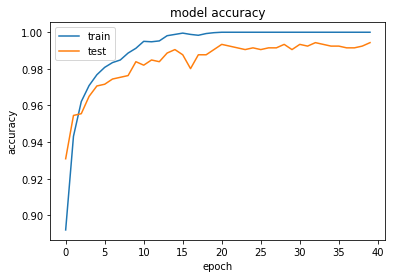

In [259]:
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h6>Plotting loss curve.</h6>

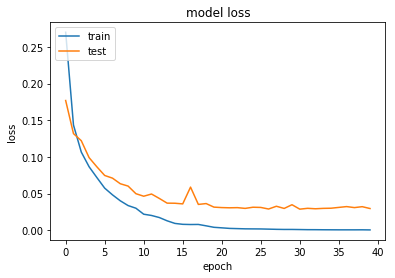

In [260]:
# summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [261]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

<h6>Confusion Matrix</h6>

In [262]:
print(confusion_matrix(y_test, y_pred))

[[1117    3]
 [   6  194]]


<h6>Accuracy and Loss Score</h6>

In [265]:
loss, acc = classifier.evaluate(X_test, y_test, verbose=0)

In [266]:
print("Accuracy:",acc," and Loss:",loss)

Accuracy: 0.9931818181818182  and Loss: 0.04057913881230034


<h6>F1 score, Precision and Recall.</h6>

In [269]:
print("F1 score: ", f1_score(y_pred, y_test,average="macro"))
print("Precision: ", precision_score(y_pred, y_test,average="macro"))
print("Recall: ", recall_score(y_pred, y_test,average="macro"))

F1 score:  0.9866587457648817
Precision:  0.9836607142857143
Recall:  0.9897143709516297


# End of Answer

<h1>Trial Runs/Rough Work</h1>

<center><h2>Using Grid Search to find optimum no. of layers, epochs and batch size.</h2></center>

<center><h3>This was taking huge time in my machine and Google collab, so I tried doing it manually.</h3></center>

In [64]:
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# from tensorflow.keras.activations import relu, sigmoid

# def create_model(layers, activation):
#     model = Sequential()
#     for i, nodes in enumerate(layers):
#         if i==0:
#             model.add(Dense(nodes,input_dim=X_train.shape[1]))
#             model.add(Activation(activation))
#             model.add(Dropout(0.3))
#         else:
#             model.add(Dense(nodes))
#             model.add(Activation(activation))
#             model.add(Dropout(0.3))
            
#     model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) 
    
#     model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#     return model

# model = KerasClassifier(build_fn=create_model, verbose=0)

# layers = [[6, 6, 3], [40, 20, 6]]
# activations = ['sigmoid', 'relu']
# param_grid = dict(layers=layers, activation=activations, batch_size = [10], epochs=[100])
# grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=5)

# grid_result = grid.fit(X_train, y_train)
# print(grid_result.best_score_,grid_result.best_params_)
# y_pred = grid.predict(X_test)
# y_pred = (y_pred > 0.5)
# cm = confusion_matrix(y_test, y_pred)
# score = accuracy_score(y_pred, y_test)

<center><h1>Multi Layered Neural Network. Several Test Runs.</h1></center>

<h3>Simple Sequential model with [6,6,1] layers, batch size = 10 and epochs = 100</h3>

In [70]:
classifier = Sequential()

In [71]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

In [72]:
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

In [73]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [74]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_361 (Dense)            (None, 6)                 1002      
_________________________________________________________________
dense_362 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_363 (Dense)            (None, 1)                 7         
Total params: 1,051
Trainable params: 1,051
Non-trainable params: 0
_________________________________________________________________


In [75]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [76]:
model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 12s 3ms/step - loss: 0.3303 - acc: 0.8477 - val_loss: 0.2521 - val_acc: 0.8892
Epoch 2/100
4222/4222 [==============================] - 2s 485us/step - loss: 0.2116 - acc: 0.9157 - val_loss: 0.1720 - val_acc: 0.9422
Epoch 3/100
4222/4222 [==============================] - 2s 468us/step - loss: 0.1398 - acc: 0.9479 - val_loss: 0.1349 - val_acc: 0.9564
Epoch 4/100
4222/4222 [==============================] - 2s 451us/step - loss: 0.1132 - acc: 0.9612 - val_loss: 0.1174 - val_acc: 0.9612
Epoch 5/100
4222/4222 [==============================] - 2s 488us/step - loss: 0.0967 - acc: 0.9661 - val_loss: 0.1027 - val_acc: 0.9650
Epoch 6/100
4222/4222 [==============================] - 2s 469us/step - loss: 0.0829 - acc: 0.9702 - val_loss: 0.0920 - val_acc: 0.9687
Epoch 7/100
4222/4222 [==============================] - 2s 458us/step - loss: 0.0740 - acc: 0.9744 - val_loss: 0.0862 - val_acc: 0

4222/4222 [==============================] - 2s 432us/step - loss: 3.2693e-04 - acc: 1.0000 - val_loss: 0.0406 - val_acc: 0.9915
Epoch 60/100
4222/4222 [==============================] - 2s 450us/step - loss: 2.8008e-04 - acc: 1.0000 - val_loss: 0.0401 - val_acc: 0.9924
Epoch 61/100
4222/4222 [==============================] - 2s 451us/step - loss: 3.1947e-04 - acc: 1.0000 - val_loss: 0.0507 - val_acc: 0.9867
Epoch 62/100
4222/4222 [==============================] - 2s 428us/step - loss: 0.0260 - acc: 0.9941 - val_loss: 0.0555 - val_acc: 0.9877
Epoch 63/100
4222/4222 [==============================] - 2s 424us/step - loss: 0.0021 - acc: 0.9993 - val_loss: 0.0460 - val_acc: 0.9905
Epoch 64/100
4222/4222 [==============================] - 2s 440us/step - loss: 5.5123e-04 - acc: 1.0000 - val_loss: 0.0397 - val_acc: 0.9905
Epoch 65/100
4222/4222 [==============================] - 2s 509us/step - loss: 2.9421e-04 - acc: 1.0000 - val_loss: 0.0399 - val_acc: 0.9905
Epoch 66/100
4222/4222 [===

In [77]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

[[1116    4]
 [   7  193]]
0.9916666666666667


<h3>Simple Sequential model with [6,3,1] layers, batch size = 10 and epochs = 100. Reduced nodes in the 2nd layer that decreased accuracy from 99.167% to 98.712%</h3>

In [79]:
classifier = Sequential()

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 3, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_364 (Dense)            (None, 6)                 1002      
_________________________________________________________________
dense_365 (Dense)            (None, 3)                 21        
_________________________________________________________________
dense_366 (Dense)            (None, 1)                 4         
Total params: 1,027
Trainable params: 1,027
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 11s 3ms/step - loss: 0.3598 - acc: 0.8709 - val_loss: 0.2192 - val_acc: 0.9138
Epoch 2/100
4222/4222 [==============================] - 2s 436us/step - loss: 0.1979 - acc: 0.9261 - val_loss: 0.1750 - val_acc: 0.9384
Epoch 3/100
4222/4222 [==============================] - 2s 437us/step - loss: 0.15

4222/4222 [==============================] - 2s 445us/step - loss: 0.0153 - acc: 0.9934 - val_loss: 0.0427 - val_acc: 0.9830
Epoch 55/100
4222/4222 [==============================] - 2s 432us/step - loss: 0.0103 - acc: 0.9962 - val_loss: 0.0287 - val_acc: 0.9905
Epoch 56/100
4222/4222 [==============================] - 2s 433us/step - loss: 0.0077 - acc: 0.9979 - val_loss: 0.0311 - val_acc: 0.9886
Epoch 57/100
4222/4222 [==============================] - 2s 432us/step - loss: 0.0079 - acc: 0.9974 - val_loss: 0.0360 - val_acc: 0.9886
Epoch 58/100
4222/4222 [==============================] - 2s 433us/step - loss: 0.0124 - acc: 0.9957 - val_loss: 0.0333 - val_acc: 0.9867
Epoch 59/100
4222/4222 [==============================] - 2s 434us/step - loss: 0.0126 - acc: 0.9960 - val_loss: 0.0294 - val_acc: 0.9915
Epoch 60/100
4222/4222 [==============================] - 2s 437us/step - loss: 0.0079 - acc: 0.9972 - val_loss: 0.0262 - val_acc: 0.9896
Epoch 61/100
4222/4222 [=======================

<h3>Simple Sequential model with [20,6,1] layers, batch size = 10 and epochs = 100.
Increased the no. of nodes in 1st hidden layer which increased the accuracy to 99.318%</h3>

In [80]:
classifier = Sequential()

classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_367 (Dense)            (None, 20)                3340      
_________________________________________________________________
dense_368 (Dense)            (None, 6)                 126       
_________________________________________________________________
dense_369 (Dense)            (None, 1)                 7         
Total params: 3,473
Trainable params: 3,473
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 11s 3ms/step - loss: 0.2866 - acc: 0.8875 - val_loss: 0.1734 - val_acc: 0.9384
Epoch 2/100
4222/4222 [==============================] - 2s 446us/step - loss: 0.1357 - acc: 0.9455 - val_loss: 0.1356 - val_acc: 0.9479
Epoch 3/100
4222/4222 [==============================] - 2s 448us/step - loss: 0.10

Epoch 54/100
4222/4222 [==============================] - 2s 495us/step - loss: 7.5406e-05 - acc: 1.0000 - val_loss: 0.0423 - val_acc: 0.9915
Epoch 55/100
4222/4222 [==============================] - 2s 443us/step - loss: 6.4505e-05 - acc: 1.0000 - val_loss: 0.0424 - val_acc: 0.9915
Epoch 56/100
4222/4222 [==============================] - 2s 442us/step - loss: 5.5985e-05 - acc: 1.0000 - val_loss: 0.0438 - val_acc: 0.9915
Epoch 57/100
4222/4222 [==============================] - 2s 491us/step - loss: 0.0439 - acc: 0.9901 - val_loss: 0.0583 - val_acc: 0.9915
Epoch 58/100
4222/4222 [==============================] - 3s 656us/step - loss: 0.0019 - acc: 0.9993 - val_loss: 0.0562 - val_acc: 0.9924
Epoch 59/100
4222/4222 [==============================] - 2s 475us/step - loss: 4.6156e-04 - acc: 1.0000 - val_loss: 0.0516 - val_acc: 0.9924
Epoch 60/100
4222/4222 [==============================] - 2s 512us/step - loss: 2.5405e-04 - acc: 1.0000 - val_loss: 0.0536 - val_acc: 0.9915
Epoch 61/100
4

<h3>Simple Sequential model with [50,6,1] layers, batch size = 10 and epochs = 100.
Increased the no. of nodes in 1st hidden layer which increased the accuracy to 99.469%</h3>

In [81]:
classifier = Sequential()

classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_370 (Dense)            (None, 50)                8350      
_________________________________________________________________
dense_371 (Dense)            (None, 6)                 306       
_________________________________________________________________
dense_372 (Dense)            (None, 1)                 7         
Total params: 8,663
Trainable params: 8,663
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 11s 3ms/step - loss: 0.2656 - acc: 0.8823 - val_loss: 0.1604 - val_acc: 0.9441
Epoch 2/100
4222/4222 [==============================] - 2s 448us/step - loss: 0.1346 - acc: 0.9486 - val_loss: 0.1168 - val_acc: 0.9602
Epoch 3/100
4222/4222 [==============================] - 2s 443us/step - loss: 0.09

4222/4222 [==============================] - 2s 439us/step - loss: 1.3160e-04 - acc: 1.0000 - val_loss: 0.0430 - val_acc: 0.9924
Epoch 54/100
4222/4222 [==============================] - 2s 463us/step - loss: 1.0316e-04 - acc: 1.0000 - val_loss: 0.0421 - val_acc: 0.9924
Epoch 55/100
4222/4222 [==============================] - 2s 536us/step - loss: 9.2316e-05 - acc: 1.0000 - val_loss: 0.0409 - val_acc: 0.9934
Epoch 56/100
4222/4222 [==============================] - 2s 501us/step - loss: 7.7555e-05 - acc: 1.0000 - val_loss: 0.0412 - val_acc: 0.9924
Epoch 57/100
4222/4222 [==============================] - 2s 476us/step - loss: 6.8717e-05 - acc: 1.0000 - val_loss: 0.0390 - val_acc: 0.9934
Epoch 58/100
4222/4222 [==============================] - 2s 466us/step - loss: 6.1147e-05 - acc: 1.0000 - val_loss: 0.0402 - val_acc: 0.9934
Epoch 59/100
4222/4222 [==============================] - 2s 444us/step - loss: 0.0341 - acc: 0.9934 - val_loss: 0.0964 - val_acc: 0.9820
Epoch 60/100
4222/4222 

<h3>Simple Sequential model with [80,6,1] layers, batch size = 10 and epochs = 100.
Increased the no. of nodes in 1st hidden layer which increased the accuracy to 99.545%</h3>

In [82]:
classifier = Sequential()

classifier.add(Dense(units = 80, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_373 (Dense)            (None, 80)                13360     
_________________________________________________________________
dense_374 (Dense)            (None, 6)                 486       
_________________________________________________________________
dense_375 (Dense)            (None, 1)                 7         
Total params: 13,853
Trainable params: 13,853
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 11s 3ms/step - loss: 0.2652 - acc: 0.8892 - val_loss: 0.1525 - val_acc: 0.9299
Epoch 2/100
4222/4222 [==============================] - 2s 452us/step - loss: 0.1283 - acc: 0.9429 - val_loss: 0.1209 - val_acc: 0.9650
Epoch 3/100
4222/4222 [==============================] - 2s 451us/step - loss: 0.

4222/4222 [==============================] - 2s 564us/step - loss: 1.0913e-04 - acc: 1.0000 - val_loss: 0.0370 - val_acc: 0.9943
Epoch 54/100
4222/4222 [==============================] - 2s 553us/step - loss: 8.7775e-05 - acc: 1.0000 - val_loss: 0.0368 - val_acc: 0.9943
Epoch 55/100
4222/4222 [==============================] - 2s 458us/step - loss: 7.3256e-05 - acc: 1.0000 - val_loss: 0.0367 - val_acc: 0.9943
Epoch 56/100
4222/4222 [==============================] - 2s 453us/step - loss: 6.2568e-05 - acc: 1.0000 - val_loss: 0.0354 - val_acc: 0.9943
Epoch 57/100
4222/4222 [==============================] - 2s 450us/step - loss: 5.3641e-05 - acc: 1.0000 - val_loss: 0.0353 - val_acc: 0.9943
Epoch 58/100
4222/4222 [==============================] - 2s 575us/step - loss: 4.4459e-05 - acc: 1.0000 - val_loss: 0.0344 - val_acc: 0.9943
Epoch 59/100
4222/4222 [==============================] - 3s 599us/step - loss: 3.8872e-05 - acc: 1.0000 - val_loss: 0.0355 - val_acc: 0.9934
Epoch 60/100
4222/4

<h3>Simple Sequential model with [80,20,1] layers, batch size = 10 and epochs = 100.
Increased the no. of nodes in 2nd hidden layer which didn't changed the accuracy.</h3>

In [89]:
classifier = Sequential()

classifier.add(Dense(units = 80, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 20, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_390 (Dense)            (None, 80)                13360     
_________________________________________________________________
dense_391 (Dense)            (None, 20)                1620      
_________________________________________________________________
dense_392 (Dense)            (None, 1)                 21        
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 14s 3ms/step - loss: 0.2232 - acc: 0.9112 - val_loss: 0.1352 - val_acc: 0.9479
Epoch 2/100
4222/4222 [==============================] - 2s 499us/step - loss: 0.1042 - acc: 0.9614 - val_loss: 0.1020 - val_acc: 0.9659
Epoch 3/100
4222/4222 [==============================] - 2s 482us/step - loss: 0.

4222/4222 [==============================] - 2s 481us/step - loss: 3.9341e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9943
Epoch 54/100
4222/4222 [==============================] - 2s 494us/step - loss: 2.7055e-04 - acc: 1.0000 - val_loss: 0.0668 - val_acc: 0.9943
Epoch 55/100
4222/4222 [==============================] - 2s 566us/step - loss: 2.1239e-04 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9943
Epoch 56/100
4222/4222 [==============================] - 2s 483us/step - loss: 1.4648e-04 - acc: 1.0000 - val_loss: 0.0673 - val_acc: 0.9934
Epoch 57/100
4222/4222 [==============================] - 2s 550us/step - loss: 1.1403e-04 - acc: 1.0000 - val_loss: 0.0665 - val_acc: 0.9943
Epoch 58/100
4222/4222 [==============================] - 2s 525us/step - loss: 1.3395e-04 - acc: 1.0000 - val_loss: 0.0666 - val_acc: 0.9943
Epoch 59/100
4222/4222 [==============================] - 2s 482us/step - loss: 1.4891e-04 - acc: 1.0000 - val_loss: 0.0652 - val_acc: 0.9943
Epoch 60/100
4222/4

<h3>Adding dropouts or extra layers decreased the accuracy.</h3>

In [85]:
classifier = Sequential()

classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_383 (Dense)            (None, 50)                8350      
_________________________________________________________________
dense_384 (Dense)            (None, 6)                 306       
_________________________________________________________________
dense_385 (Dense)            (None, 6)                 42        
_________________________________________________________________
dense_386 (Dense)            (None, 1)                 7         
Total params: 8,705
Trainable params: 8,705
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 12s 3ms/step - loss: 0.3327 - acc: 0.8671 - val_loss: 0.1724 - val_acc: 0.9394
Epoch 2/100
4222/4222 [==============================] - 2s 514us/step - loss: 0.1321 - 

Epoch 53/100
4222/4222 [==============================] - 2s 505us/step - loss: 3.3448e-04 - acc: 1.0000 - val_loss: 0.0401 - val_acc: 0.9915
Epoch 54/100
4222/4222 [==============================] - 2s 540us/step - loss: 3.0276e-04 - acc: 1.0000 - val_loss: 0.0390 - val_acc: 0.9915
Epoch 55/100
4222/4222 [==============================] - 2s 505us/step - loss: 2.8369e-04 - acc: 1.0000 - val_loss: 0.0388 - val_acc: 0.9915
Epoch 56/100
4222/4222 [==============================] - 2s 516us/step - loss: 2.7238e-04 - acc: 1.0000 - val_loss: 0.0404 - val_acc: 0.9905
Epoch 57/100
4222/4222 [==============================] - 2s 515us/step - loss: 2.4241e-04 - acc: 1.0000 - val_loss: 0.0379 - val_acc: 0.9915
Epoch 58/100
4222/4222 [==============================] - 2s 495us/step - loss: 2.2326e-04 - acc: 1.0000 - val_loss: 0.0378 - val_acc: 0.9915
Epoch 59/100
4222/4222 [==============================] - 2s 522us/step - loss: 2.0576e-04 - acc: 1.0000 - val_loss: 0.0391 - val_acc: 0.9915
Epoch 

In [86]:
classifier = Sequential()

classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))
classifier.add(Dropout(0.3))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_387 (Dense)            (None, 50)                8350      
_________________________________________________________________
dropout_246 (Dropout)        (None, 50)                0         
_________________________________________________________________
dense_388 (Dense)            (None, 6)                 306       
_________________________________________________________________
dense_389 (Dense)            (None, 1)                 7         
Total params: 8,663
Trainable params: 8,663
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 14s 3ms/step - loss: 0.3642 - acc: 0.8505 - val_loss: 0.1741 - val_acc: 0.9261
Epoch 2/100
4222/4222 [==============================] - 2s 567us/step - loss: 0.1810 - 

4222/4222 [==============================] - 2s 487us/step - loss: 0.0138 - acc: 0.9950 - val_loss: 0.0362 - val_acc: 0.9915
Epoch 54/100
4222/4222 [==============================] - 2s 485us/step - loss: 0.0086 - acc: 0.9967 - val_loss: 0.0371 - val_acc: 0.9924
Epoch 55/100
4222/4222 [==============================] - 2s 487us/step - loss: 0.0099 - acc: 0.9955 - val_loss: 0.0340 - val_acc: 0.9924
Epoch 56/100
4222/4222 [==============================] - 2s 485us/step - loss: 0.0082 - acc: 0.9974 - val_loss: 0.0346 - val_acc: 0.9924
Epoch 57/100
4222/4222 [==============================] - 2s 484us/step - loss: 0.0133 - acc: 0.9967 - val_loss: 0.0414 - val_acc: 0.9896
Epoch 58/100
4222/4222 [==============================] - 2s 485us/step - loss: 0.0122 - acc: 0.9960 - val_loss: 0.0391 - val_acc: 0.9924
Epoch 59/100
4222/4222 [==============================] - 2s 487us/step - loss: 0.0080 - acc: 0.9972 - val_loss: 0.0534 - val_acc: 0.9896
Epoch 60/100
4222/4222 [=======================

In [92]:
classifier = Sequential()

classifier.add(Dense(units = 120, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_399 (Dense)            (None, 120)               20040     
_________________________________________________________________
dense_400 (Dense)            (None, 6)                 726       
_________________________________________________________________
dense_401 (Dense)            (None, 1)                 7         
Total params: 20,773
Trainable params: 20,773
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 13s 3ms/step - loss: 0.1754 - acc: 0.9330 - val_loss: 0.1237 - val_acc: 0.9536
Epoch 2/100
4222/4222 [==============================] - 2s 507us/step - loss: 0.0934 - acc: 0.9652 - val_loss: 0.0916 - val_acc: 0.9631
Epoch 3/100
4222/4222 [==============================] - 2s 510us/step - loss: 0.

4222/4222 [==============================] - 2s 520us/step - loss: 6.2714e-05 - acc: 1.0000 - val_loss: 0.0379 - val_acc: 0.9924
Epoch 54/100
4222/4222 [==============================] - 2s 517us/step - loss: 5.4912e-05 - acc: 1.0000 - val_loss: 0.0379 - val_acc: 0.9924
Epoch 55/100
4222/4222 [==============================] - 2s 512us/step - loss: 4.7355e-05 - acc: 1.0000 - val_loss: 0.0366 - val_acc: 0.9934
Epoch 56/100
4222/4222 [==============================] - 2s 519us/step - loss: 4.1102e-05 - acc: 1.0000 - val_loss: 0.0383 - val_acc: 0.9924
Epoch 57/100
4222/4222 [==============================] - 2s 508us/step - loss: 3.7128e-05 - acc: 1.0000 - val_loss: 0.0368 - val_acc: 0.9934
Epoch 58/100
4222/4222 [==============================] - 2s 521us/step - loss: 3.2140e-05 - acc: 1.0000 - val_loss: 0.0360 - val_acc: 0.9934
Epoch 59/100
4222/4222 [==============================] - 2s 537us/step - loss: 2.6527e-05 - acc: 1.0000 - val_loss: 0.0391 - val_acc: 0.9934
Epoch 60/100
4222/4

In [93]:
classifier = Sequential()

classifier.add(Dense(units = 120, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 50, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 100)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_402 (Dense)            (None, 120)               20040     
_________________________________________________________________
dense_403 (Dense)            (None, 50)                6050      
_________________________________________________________________
dense_404 (Dense)            (None, 1)                 51        
Total params: 26,141
Trainable params: 26,141
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/100
4222/4222 [==============================] - 13s 3ms/step - loss: 0.1724 - acc: 0.9311 - val_loss: 0.1111 - val_acc: 0.9612
Epoch 2/100
4222/4222 [==============================] - 2s 506us/step - loss: 0.0872 - acc: 0.9664 - val_loss: 0.0771 - val_acc: 0.9687
Epoch 3/100
4222/4222 [==============================] - 2s 520us/step - loss: 0.

4222/4222 [==============================] - 3s 608us/step - loss: 2.7423e-05 - acc: 1.0000 - val_loss: 0.0353 - val_acc: 0.9924
Epoch 54/100
4222/4222 [==============================] - 2s 554us/step - loss: 2.0923e-05 - acc: 1.0000 - val_loss: 0.0354 - val_acc: 0.9924
Epoch 55/100
4222/4222 [==============================] - 2s 508us/step - loss: 1.8148e-05 - acc: 1.0000 - val_loss: 0.0350 - val_acc: 0.9924
Epoch 56/100
4222/4222 [==============================] - 2s 504us/step - loss: 1.3515e-05 - acc: 1.0000 - val_loss: 0.0365 - val_acc: 0.9924
Epoch 57/100
4222/4222 [==============================] - 2s 510us/step - loss: 1.0733e-05 - acc: 1.0000 - val_loss: 0.0355 - val_acc: 0.9924
Epoch 58/100
4222/4222 [==============================] - 2s 505us/step - loss: 8.2460e-06 - acc: 1.0000 - val_loss: 0.0363 - val_acc: 0.9924
Epoch 59/100
4222/4222 [==============================] - 2s 507us/step - loss: 6.4869e-06 - acc: 1.0000 - val_loss: 0.0373 - val_acc: 0.9924
Epoch 60/100
4222/4

In [94]:
classifier = Sequential()

classifier.add(Dense(units = 120, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 10, nb_epoch = 10)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_405 (Dense)            (None, 120)               20040     
_________________________________________________________________
dense_406 (Dense)            (None, 6)                 726       
_________________________________________________________________
dense_407 (Dense)            (None, 1)                 7         
Total params: 20,773
Trainable params: 20,773
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/10
4222/4222 [==============================] - 13s 3ms/step - loss: 0.1882 - acc: 0.9230 - val_loss: 0.1202 - val_acc: 0.9545
Epoch 2/10
4222/4222 [==============================] - 2s 521us/step - loss: 0.0967 - acc: 0.9642 - val_loss: 0.1068 - val_acc: 0.9564
Epoch 3/10
4222/4222 [==============================] - 2s 513us/step - loss: 0.072

In [95]:
classifier = Sequential()

classifier.add(Dense(units = 120, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 166))

classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

classifier.summary()

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model = classifier.fit(X_train, y_train, validation_split = 0.2, batch_size = 100, nb_epoch = 10)

y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_pred, y_test)
print(cm)
print(score)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_408 (Dense)            (None, 120)               20040     
_________________________________________________________________
dense_409 (Dense)            (None, 6)                 726       
_________________________________________________________________
dense_410 (Dense)            (None, 1)                 7         
Total params: 20,773
Trainable params: 20,773
Non-trainable params: 0
_________________________________________________________________
Train on 4222 samples, validate on 1056 samples
Epoch 1/10
4222/4222 [==============================] - 12s 3ms/step - loss: 0.3403 - acc: 0.8629 - val_loss: 0.2137 - val_acc: 0.9167
Epoch 2/10
4222/4222 [==============================] - 0s 58us/step - loss: 0.1793 - acc: 0.9237 - val_loss: 0.1601 - val_acc: 0.9337
Epoch 3/10
4222/4222 [==============================] - 0s 60us/step - loss: 0.1408 